In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [67]:
from pycta.portfolio import Portfolio
from pycta.analysis import Analysis

In [68]:
# Load prices
prices = pd.read_csv("data/p_ob.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [69]:
# take two moving averages and apply sign-functiond
def f(price, fast=32, slow=96):
    s = price.ewm(com=slow, min_periods=300).mean()
    f = price.ewm(com=fast, min_periods=300).mean()
    return np.sign(f-s) 

In [70]:
from ipywidgets import Label, HBox, VBox, IntSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average")])
right_box = VBox([fast, slow])
HBox([left_box, right_box])

In [78]:
portfolio = Portfolio(prices=prices, position=prices.apply(f, fast=fast.value, slow=slow.value))

In [79]:
a = Analysis(portfolio.nav())
a.performance

Performance number
Annua Return                     -8.85
Annua Volatility                 16.03
Annua Sharpe Ratio (r_f = 0)     -0.55
Max Drawdown                     99.55
Return                          -98.93
Kurtosis                         33.95
dtype: object

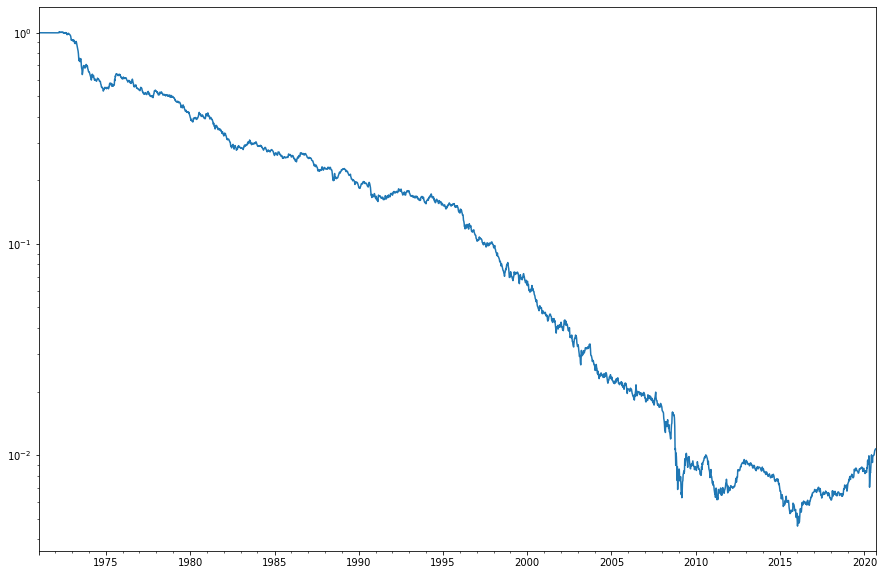

In [80]:
a.nav.plot(logy=True, figsize=(15,10))
plt.show()

In [82]:
a.monthlytable

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,STDev,YTD
Year,,,,,,,,,,,,,,
2020,-0.59%,3.34%,7.86%,-17.77%,18.86%,3.87%,4.86%,6.79%,,,,,35.54%,25.96%
2019,9.20%,2.75%,1.37%,-1.65%,9.83%,1.14%,-1.36%,-3.87%,3.75%,1.26%,-3.03%,1.43%,14.85%,21.77%
2018,0.57%,3.98%,-0.18%,-0.41%,2.65%,-0.97%,-1.59%,-2.07%,1.43%,8.05%,1.79%,-2.26%,10.25%,11.04%
2017,3.79%,-3.51%,4.26%,-2.23%,-2.69%,-1.65%,2.38%,-1.17%,1.27%,-3.88%,1.65%,-3.84%,10.35%,-5.94%
2016,-3.26%,-5.54%,12.81%,9.20%,2.14%,-1.82%,-2.78%,2.78%,-2.69%,7.95%,3.25%,2.88%,19.56%,25.85%
2015,-8.43%,1.52%,-9.04%,8.17%,-3.48%,4.26%,-13.83%,4.50%,-4.36%,8.43%,-6.63%,-2.39%,24.84%,-21.67%
2014,-2.44%,-2.55%,0.25%,-2.62%,0.31%,-0.05%,0.52%,-2.68%,-2.55%,2.13%,-4.65%,-7.90%,9.39%,-20.42%
2013,-2.34%,-0.36%,-0.39%,-1.66%,-2.57%,1.55%,-3.30%,3.16%,-0.33%,-2.41%,-2.04%,1.29%,6.83%,-9.20%
2012,-0.18%,2.26%,-1.50%,2.35%,4.34%,12.75%,-0.09%,4.15%,3.31%,0.03%,0.17%,2.61%,12.93%,33.81%


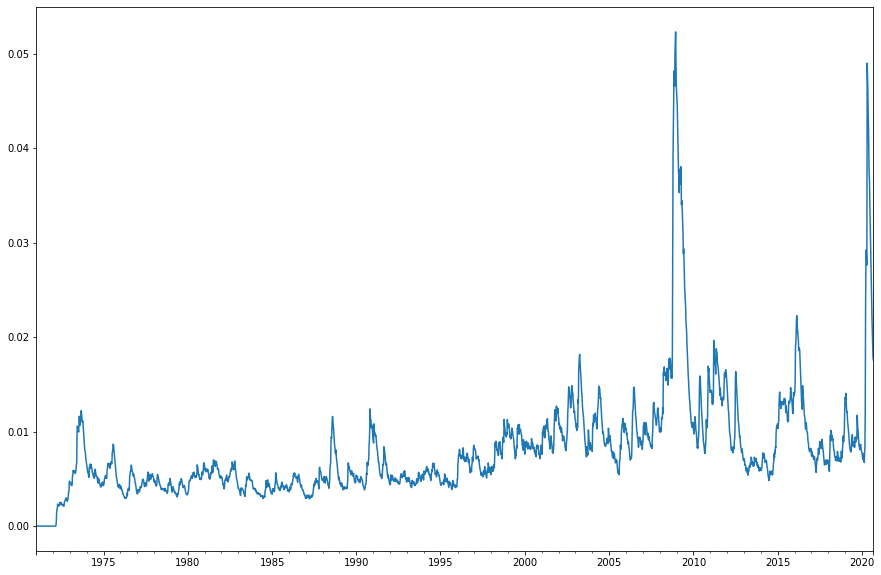

In [75]:
a.std.plot(kind="line", figsize=(15,10))
plt.show()

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position.
* Some hedge funds would argue that they are running 49 trading systems.
* Only 2 **free parameters** used here.
* Only 3 lines of code.

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position.
* Some hedge funds would argue that they are running 49 trading systems.
* Only 2 **free parameters** used here.
* Only 3 lines of code.

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position.
* Some hedge funds would argue that they are running 49 trading systems.
* Only 2 **free parameters** used here.
* Only 3 lines of code.

Results do not look terrible but...
* No concept of risk integrated. 
* The size of each bet is constant regardless of the underlying asset.
* The system lost its mojo in 2009 and has never really recovered.
* The sign function is very expensive to trade as position changes are too extreme.

Such fundamental flaws are not addressed by **parameter-hacking** or **pimp-my-trading-system** steps (remove the worst performing assets, insane quantity of stop-loss limits, ...)

